## Scooter Rentals

I have been given two years of data about scooter rentals. In this project, I have analyzed this data, created a prediction model and made data-driven determinations that may help us make future business plans.

## Import Python libraries, set Seaborn theme, and load the data set

**Import Python libraries:** Pandas will be used throughout the project. NumPy will be used to help create pivot tables. Seaborn will be used to create different visualizations of our data. The sklearn imports will be used for regression testing.

**Set Seaborn theme:** I decided to use the darkgrid theme because I believe it improves the data visualizations.

**Load the data set:** The data set used for the data analysis is in a CSV file. Fortunately, we can load this CSV file into a pandas dataframe.

In [ ]:
# Importing libraries needed for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Set seaborn theme
sns.set_theme(style="darkgrid")

In [ ]:
# Loading the Scooter Rentals CVS into a dataframe
df_scooter_rentals = pd.read_csv('http://bit.ly/scooter-rentals')

## Calculate Dimensions

Calculate the dimensions (the number of rows and columns) of the data set.

In [ ]:
# Return dimensions of the data set
df_scooter_rentals.shape

(731, 14)

## List Columns & Data Types

Column names, non-null count (731 for all columns, so there are no null entries in this data set), and different data types.

In [ ]:
# List the columns in the dataset along with their data types
df_scooter_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            731 non-null    int64  
 1   date          731 non-null    object 
 2   yr            731 non-null    int64  
 3   mnth          731 non-null    int64  
 4   weekday       731 non-null    int64  
 5   workday       731 non-null    int64  
 6   season        731 non-null    int64  
 7   holiday       731 non-null    int64  
 8   temp          731 non-null    float64
 9   atemp         731 non-null    float64
 10  hum           731 non-null    float64
 11  wind          731 non-null    float64
 12  unregistered  731 non-null    int64  
 13  registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


## Change Field Names

Some of the column names may be confusing to someone looking at them, so this step changes those names to make them easier to understand. I also want to make sure these column names were correctly changed.

In [ ]:
# Change field names
df_scooter_rentals = df_scooter_rentals.rename(columns = {'yr':'year', 'mnth': 'month', 'hum':'humidity_norm', 'temp': 'temp_norm',
                                                          'atemp':'temp_felt_norm', 'wind':'wind_norm', 'registered':'rentals_registered',
                                                          'unregistered':'rentals_unregistered'})

In [ ]:
# Verify the field names were changed as expected by listing the columns again
df_scooter_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    731 non-null    int64  
 1   date                  731 non-null    object 
 2   year                  731 non-null    int64  
 3   month                 731 non-null    int64  
 4   weekday               731 non-null    int64  
 5   workday               731 non-null    int64  
 6   season                731 non-null    int64  
 7   holiday               731 non-null    int64  
 8   temp_norm             731 non-null    float64
 9   temp_felt_norm        731 non-null    float64
 10  humidity_norm         731 non-null    float64
 11  wind_norm             731 non-null    float64
 12  rentals_unregistered  731 non-null    int64  
 13  rentals_registered    731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


## Preview Records

Having changed the column names, I am now looking at the first five rows in the data set to see what is in there.

In [ ]:
# Preview the first 5 records in the dataset
df_scooter_rentals.head(5)

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,1,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,1,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,1,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,1,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,1,0,0.226957,0.229270,0.436957,0.186900,82,1518


## Replace Data

The values in the "season" column are listed as numbers - 1, 2, 3, and 4. Replacing them with season names winter, spring, summer, and fall will make them easier to understand.

As shown above in List Columns & Data Types, the "season" column has data type int64, which is numeric. Before replacing the data, I first have to change the data type so the column will accept string values. I then replace the numbers with the season names, and check the first five records in the data set again to make sure the changes were applied correctly.

In [ ]:
# Change the data type of the season column so it can accept strings. Do this so the numbers in that column can be replaced with season names.
df_scooter_rentals['season'] = df_scooter_rentals['season'].astype(str)

In [ ]:
# Replace numbers in the season field
df_scooter_rentals['season'] = df_scooter_rentals['season'].replace(['1', '2', '3', '4'], ['winter', 'spring', 'summer', 'fall'])

In [ ]:
# Preview the first 5 records in the dataset again to make sure the numbers in the season field were replaced as expected
df_scooter_rentals.head(5)

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518


## Create a New Column

"rentals_total" contains the sum of the unregistered and registered scooter rentals for each date. The values in this new column will be important for data analysis. Once again, I preview the first five rows to make sure the new column was created as expected and that it contains the expected values.

In [ ]:
# Create a new column called "rentals_total" that sums registered and unregistered rentals.
df_scooter_rentals['rentals_total'] = df_scooter_rentals['rentals_unregistered'] + df_scooter_rentals['rentals_registered']

In [ ]:
# Preview the first 5 records in the dataset again to make sure rentals_total column was created and populated as expected
df_scooter_rentals.head(5)

,ID,date,year,month,weekday,workday,season,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
0,1,1/1/2011,0,1,6,0,winter,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,0,winter,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,winter,0,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,winter,0,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,winter,0,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Generate Descriptive Stats

These statistics can tell us a few things about our data set. For example, we can see that the lowest number of unregistered scooter rentals in a single day was 2, while the highest single day number was 3,410.

I used the round function here so each stat would be rounded to two decimal places. Without it, the numbers can get quite long - and I will use round in later parts of the data analysis.

In [ ]:
# Generate descriptive stats for the numeric columns in the dataset. Round each value to 2 decimal places.
round(df_scooter_rentals.describe(), 2)

,ID,year,month,weekday,workday,holiday,temp_norm,temp_felt_norm,humidity_norm,wind_norm,rentals_unregistered,rentals_registered,rentals_total
count,731.00,731.0,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,0.5,6.52,3.0,0.68,0.03,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,0.5,3.45,2.0,0.47,0.17,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,0.0,1.00,0.0,0.00,0.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,0.0,4.00,1.0,0.00,0.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,1.0,7.00,3.0,1.00,0.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,1.0,10.00,5.0,1.00,0.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,1.0,12.00,6.0,1.00,1.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


## Missing Values

I noted above, in List Columns & Data Types, that the non-null count in each column matched the number of rows in the data set. This code block was not *strictly* necessary.

However, I wanted to double check, and this function is a more explicit way of returning the number of null values in each column of a data set. The sum for all columns is zero, so no rows were dropped.

In [ ]:
# Determine if there are any missing values in the dataset.
df_scooter_rentals.isnull().sum()

ID                      0
date                    0
year                    0
month                   0
weekday                 0
workday                 0
season                  0
holiday                 0
temp_norm               0
temp_felt_norm          0
humidity_norm           0
wind_norm               0
rentals_unregistered    0
rentals_registered      0
rentals_total           0
dtype: int64

## Create the First Pivot Table

This is the first of two pivot tables. This table shows total rental figures - the total for each season in each of the two years included in the data set, as well as minimum and maximum total scooter rentals.

A trend already emerges here, as scooter rentals decline in the winter and peak in the summer.

In [ ]:
# Create a pivot table that has "year" and "season" as indices and that calculates the sum, minimum, and maximum for the "rentals_total" columns.
first_df_pivot = pd.pivot_table(df_scooter_rentals, index=['year', 'season'], values=['rentals_total'], aggfunc=[np.sum, np.min, np.max])
first_df_pivot

sum          amin          amax
            rentals_total rentals_total rentals_total
year season                                          
0    fall          326137           627          5511
     spring        347316           795          5805
     summer        419650          1115          6043
     winter        150000           431          3239
1    fall          515476            22          8555
     spring        571273          1027          8362
     summer        641479          4073          8714
     winter        321348           441          7836

## Create the Second Pivot Table

The second pivot table shows total rental figures by month instead of season. This is a more focused data set and gives us more information about scooter rental trends.

What caught my eye here is the difference in the highest monthly total each year. Rentals peak in June of the first year, and in September in the second!

In [ ]:
# Create a pivot table that has "year" and "month" as indices and that and that sums and averages the "rentals_total".
first_df_pivot = pd.pivot_table(df_scooter_rentals, index=['year', 'month'], values=['rentals_total'], aggfunc=[np.sum, np.average])
first_df_pivot

sum       average
           rentals_total rentals_total
year month                            
0    1             38189   1231.903226
     2             48215   1721.964286
     3             64045   2065.967742
     4             94870   3162.333333
     5            135821   4381.322581
     6            143512   4783.733333
     7            141341   4559.387097
     8            136691   4409.387097
     9            127418   4247.266667
     10           123511   3984.225806
     11           102167   3405.566667
     12            87323   2816.870968
1    1             96744   3120.774194
     2            103137   3556.448276
     3            164875   5318.548387
     4            174224   5807.466667
     5            195865   6318.225806
     6            202830   6761.000000
     7            203607   6567.967742
     8            214503   6919.451613
     9            218573   7285.766667
     10           198841   6414.225806
     11           152664   5088.800000
     12           123713   3990.741935

## Generate visualizations

The first data visualization is a histogram showing the distribution of the total rental values. The center here is around 4,000, maybe closer to 5,000 per day.

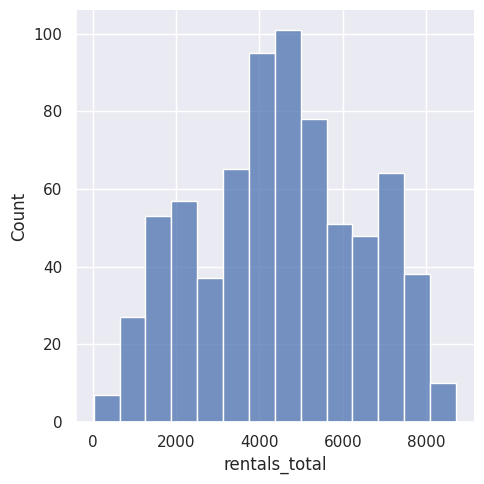

In [ ]:
# Generate a histogram using seaborn's "displot" function
sns.displot(df_scooter_rentals, x="rentals_total");

This scatterplot shows us the scooter rentals, registered or unregistered, and whether they were rented on a weekday or weekend. Unregistered rentals generally increase greatly on weekends.

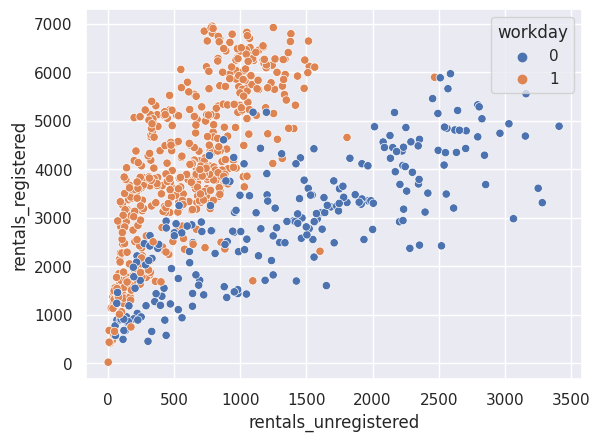

In [ ]:
# Generate a scatterplot using seaborn's "scatterplot" function
sns.scatterplot(x="rentals_unregistered", y="rentals_registered", hue="workday", data=df_scooter_rentals);

This swarmplot depicts daily scooter rentals by season. Winter rentals are generally lower, with many total rental values clustered toward the lower end. Spring appears to have the most even spread of higher and lower rentals by end,with fall not far behind, and summer has more of its rentals toward the higher end.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


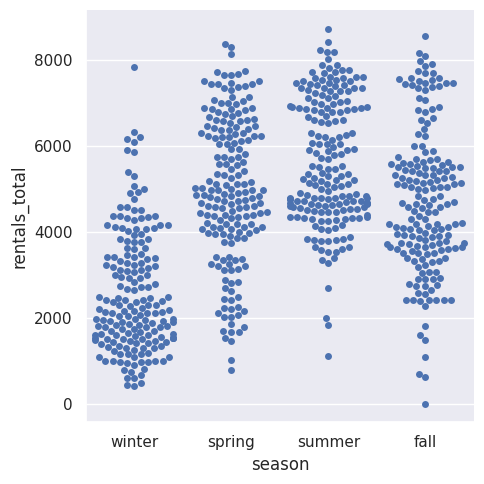

In [ ]:
# Generate a swarmplot to explore the total rentals by season
sns.catplot(data=df_scooter_rentals, x="season", y="rentals_total", kind="swarm")

This line plot shows average daily rentals by month, with lines separated by year. The rental averages for the second year were above the first on all 12 months.

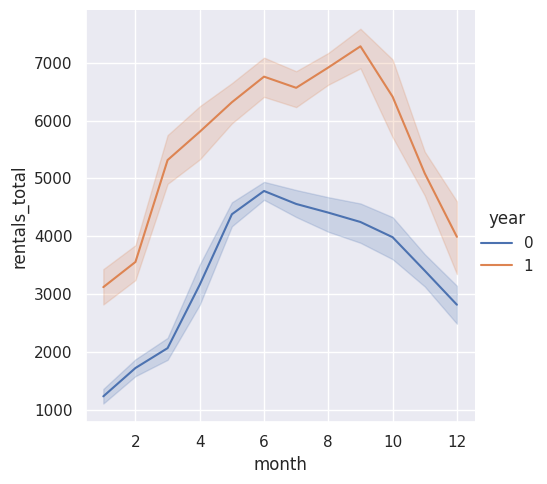

In [ ]:
# Generate a line plot that shows average daily rentals by month
sns.relplot(data=df_scooter_rentals, kind="line", x="month", y="rentals_total", hue="year")

This pairplot shows the relationship between total rentals and different weather indicators - the normal temperature, normal "feels like" temperature, normal humidity, and normal wind.

We do see a positive relationship between scooter rentals and normal temperature or normal "feels like" temperature. As it gets warmer, generally more scooters are rented out.

Whatever relationship exists between scooter rentals and wind or humidity does not appear to be strong, and the heatmap below will also show this.

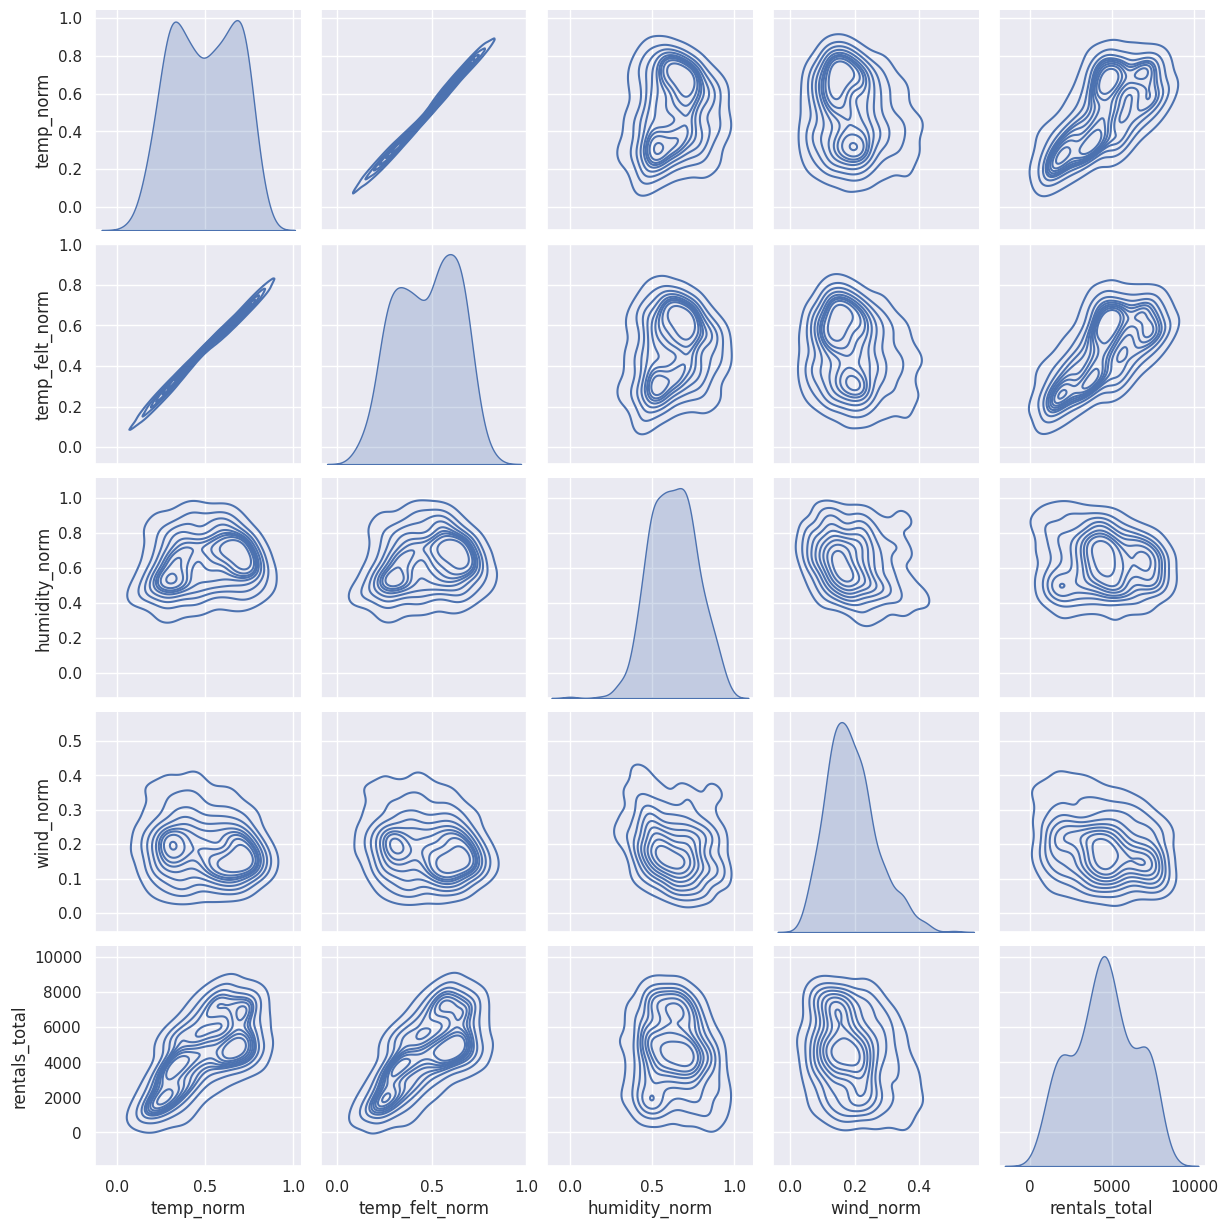

In [ ]:
# Generate a pairplot to show the relationship between "rentals_total" and the weather indicators
sns.pairplot(df_scooter_rentals.iloc[:, [8, 9, 10, 11, 14]], kind="kde");

This heatmap is another way to visualize what is shown in the pairplot, using colors and numeric values to depict the nature of relationships. Lighter colors and positive numbers approaching 1 indicate stronger positive relationships, while deeper purples and negative numbers approaching 1 indicate stronger negative relationships.

What is shown here is consistent with the pairplot - the relationship between total rentals and temp_norm or temp_felt_norm is 0.63, so a fairly strong positive relationship. This means that generally, as it gets warmer, more scooters are rented out.

The relationship between total rentals and wind/humidity is negative. The relationship with wind is a bit stronger, at -0.23 compared to -0.1 for total rentals and humidity, but their relationship is not as strong as the temperature or "feels like" temperature. As wind and humidity increase, rental totals tend to decrease, but by a lesser amount.

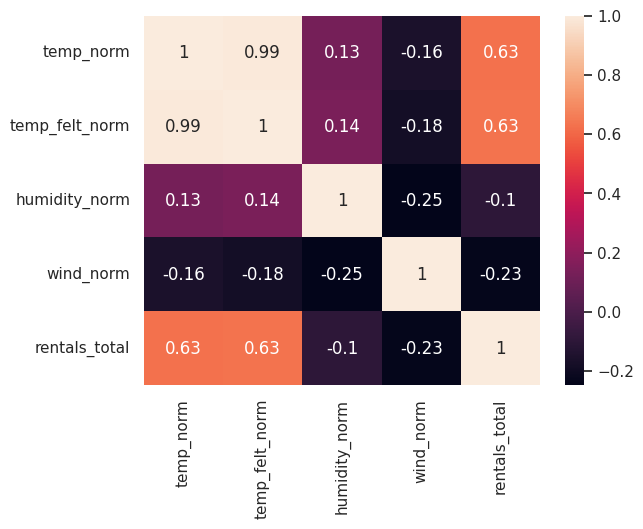

In [ ]:
# Generate a heatmap to visualize the correlation between "rentals_total" and the weather indicators
corr = df_scooter_rentals.iloc[:, [8, 9, 10, 11, 14]].corr()
sns.heatmap(corr, annot=True);

## Modeling

The next few steps are to build a model that will predict scooter rentals given temperatures.

In [ ]:
# Separate the dependent variable (y) from the independent variables (X).
X = df_scooter_rentals[['temp_norm']]
y = df_scooter_rentals['rentals_total']

In [ ]:
# Split the data into training and test sets, and put 25% of the data into the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Train the linear regression model using the training data.
model = LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

In [ ]:
# Display the y-intercept and coefficients of our regression model.
print(round(model.intercept_, 2))
print(model.coef_)

1327.93
[6463.96764523]


In [ ]:
# Predict "rentals_total" when "temp_norm" = 0.30
new_X = [[0.30]]
model.predict(new_X)

array([3267.12110394])

In [ ]:
# Make predictions in the test data.
y_pred = model.predict(X_test.values)

The r-squared score determines the performance of the model. The number will be between 0 and 1, with scores closer to 1 indicating a more accurate prediction.

Here, the score is 0.375, so not very accurate. This is not surprising, because the model I created only used one independent variable, normal temperature. Adding independent variables to the model, like humidity_norm and wind_norm will make its predictions more accurate.

In [ ]:
# Evaluate the performance of the model (r-squared).
metrics.r2_score(y_test, y_pred)

0.37540464616240443

## Summary

Scooter rentals generally peak in the warmer months of the year. Temperature and "feels like" temperature have a positive relationship with rentals - as the temperature goes up, the number of rentals generally go up as well. Wind and humidity have a negative relationship - as they go up, rentals go down, but the effect is not as strong.

Because of this, a prediction model based off temperature alone does not lead to very accurate predictions. A model that accounts for these other factors will likely lead to more accurate rental predictions.